In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML

from math import sqrt
%matplotlib inline

In [1]:
def sciPrintR(val, relErr, name=None):
    if name != None:
        print(name, val, "+-", val * relErr, "(", relErr * 100., "%)")
    else:
        print(val, "+-", val * relErr, "(", relErr * 100., "%)")
        
def sciPrintD(val, dErr, name=None):
    if name != None:
        print(name, val, "+-", dErr, "(", (dErr/val) * 100., "%)")
    else:
        print(val, "+-", dErr, "(", (dErr/val) * 100., "%)")
        
def prodErrorR(errors):
    errors = np.array(errors)
    return np.sqrt((errors**2).sum())

def prodErrorR_degs(errors):
    errors = np.array([(deg**2) * (error**2) for deg, error in errors])
    return np.sqrt(errors.sum())

def eval_mnk(x, y):
    assert len(x) == len(y)
    n = len(x)
    b = ((x*y).mean() - (x).mean() * (y).mean()) / ((x**2).mean() - (x).mean()**2)
    a = (y).mean() - b * (x).mean()
    sigma_b = 1./sqrt(n) * sqrt(((y**2).mean() - (y).mean()**2)/((x**2).mean() - (x).mean()**2) - b**2)
    sigma_a = sigma_b*sqrt((x**2).mean() - (x).mean()**2)
    return a, b, sigma_a, sigma_b

def plt_lab_figure(X_max, Y_max):
    fig = plt.figure(figsize=(8, 16))
    ax = fig.add_subplot(111)
    k_off = 1.05
    x_minor_ticks = np.linspace(0, X_max * k_off + 0.0001, 125) # 104 
    x_major_ticks = np.array([x_minor_ticks[i] for i in range(0, x_minor_ticks.size, 20)])
    y_minor_ticks = np.linspace(0, Y_max * k_off + 0.0001, 248) # 4822
    y_major_ticks = np.array([y_minor_ticks[i] for i in range(0, y_minor_ticks.size, 20)])


    ax.set_xticks(x_major_ticks)
    ax.set_xticks(x_minor_ticks, minor=True)
    ax.set_yticks(y_major_ticks)
    ax.set_yticks(y_minor_ticks, minor=True)
    ax.grid(which='minor', alpha=0.4, linestyle='-')
    ax.grid(which='major', alpha=0.7, linestyle='-')


    plt.xlim((0, X_max * k_off))
    plt.ylim((0, Y_max * k_off))

## Тест с нагреваемой трубой

In [21]:

def doall(a, temp):
    b = np.arange(len(a)) + 1

    global test_id
    # plt.figure(figsize=(15, 6))

    k, t = np.polyfit(b, a, 1)
    mnk_a, mnk_b, sigma_a, sigma_b = eval_mnk(b, a)
    
    assert(abs(mnk_a -t) + abs(mnk_b - k) < 1e-8) 
    print("\n___Опыт " + str(test_id) + "____" )

    
    
    plt.plot(b, a, 'o')
    b = np.r_[[0], b]
    plt.plot(b, k * b + t, label="["+str(test_id)+"] "+str(temp)+"$C^o$")
    #plt.xlim(-0.5, b.max() + 0.5)
    #plt.ylim(-100, a.max() * 1.1)

    l = 0.7 #m
    c = k * l * 2
    RE_c = prodErrorR([0.001 / l, sigma_b / mnk_b])
    sciPrintR(c, RE_c, "c (скорость звука) = ")
    
    m = 29e-3
    r = 8.31
    t0 = 273
    temp += t0
    gamma = m * c ** 2 / r / temp
    RE_gamma = prodErrorR([0.1 / temp, RE_c, RE_c])
    sciPrintR(gamma, RE_gamma, "gamma = ")
    test_id += 1
    
    global ct
    ct.append((c, temp))


___Опыт 1____
c (скорость звука) =  343.65 +- 1.01364155182 ( 0.294963349868 %)
gamma =  1.39703618369 +- 0.00584682343215 ( 0.418516248929 %)

___Опыт 2____
c (скорость звука) =  354.105 +- 1.19507179375 ( 0.337490798986 %)
gamma =  1.39803084921 +- 0.00668751106965 ( 0.478352181815 %)

___Опыт 3____
c (скорость звука) =  359.045 +- 0.828901668007 ( 0.230862891283 %)
gamma =  1.3928110966 +- 0.00456778032574 ( 0.327954044657 %)

___Опыт 4____
c (скорость звука) =  363.85 +- 0.930878897664 ( 0.255841390041 %)
gamma =  1.38738661134 +- 0.00503702429422 ( 0.363058447664 %)


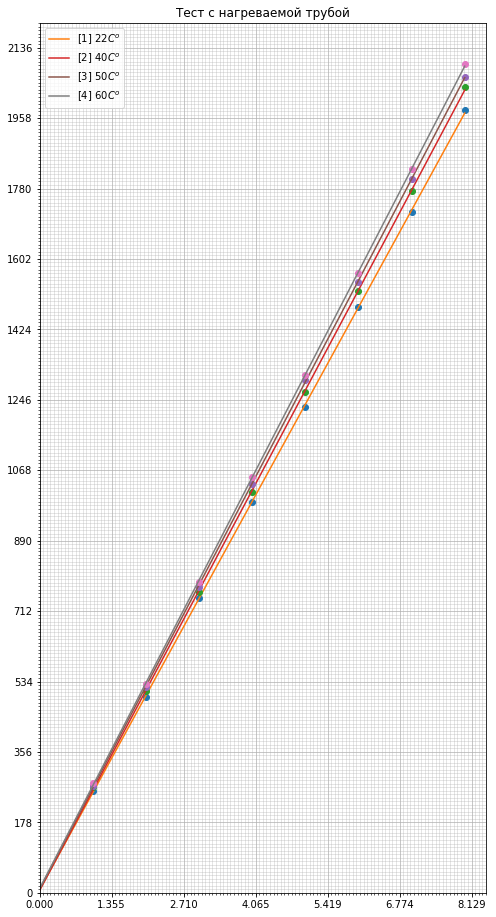

In [22]:
ct = []
test_id = 1
plt_lab_figure(8, 2094)
doall(np.array([257, 496, 746, 988, 1228, 1480, 1722, 1978]), 22)
doall(np.array([266.7, 510.7, 760, 1014.3, 1267, 1521, 1773, 2038]), 40)
doall(np.array([269.7, 519.5, 774.3, 1034, 1296, 1545, 1804, 2062]), 50)
doall(np.array([277, 527.6, 786, 1050, 1310, 1566, 1830, 2094]), 60)
plt.legend()
plt.title("Тест с нагреваемой трубой")
plt.savefig("2.1.3_1_a.png", papertype="a4", format="png", bbox_inches=0)
plt.show()

[[ 343.65   295.   ]
 [ 354.105  313.   ]
 [ 359.045  323.   ]
 [ 363.85   333.   ]]
[ 295.  313.  323.  333.]


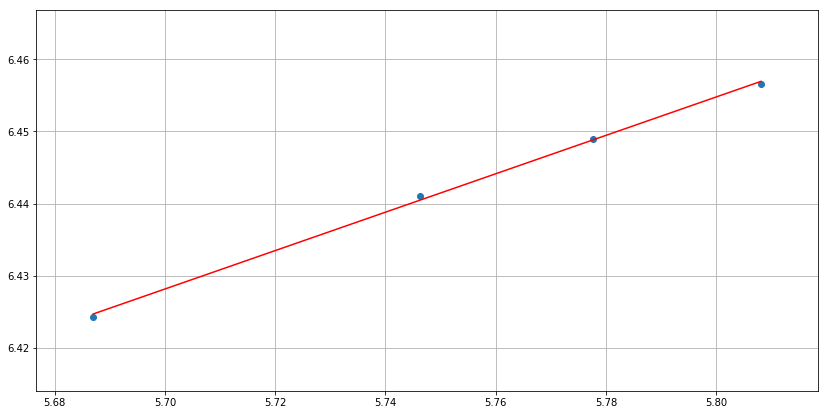

In [37]:
ct = np.array(ct)
print(ct)
print(ct[:, 1])
plt.figure(figsize=(14, 7))
plt.scatter(np.log(ct[:,1]), np.log(ct[:,0] + 273))
k,t = np.polyfit(np.log(ct[:,1]), np.log(ct[:,0] + 273), deg=1)
grid = np.linspace(np.log(ct[:,1]).min(), np.log(ct[:,1]).max(), 1000)
plt.plot(grid, grid*k + t, color="red")
plt.grid()
#plt.xlim(xmin=0, xmax=grid[-1]*1.05)
#plt.ylim(ymin=0, ymax=k*grid[-1]*1.05 + t)
plt.show()

!convert 2.1.3_1_a.png 2.1.3_1_a.pdf

## Тест с раздвижной трубой


___Опыт 1____
Частота =  3149.66666667


,1,2,3,4,5
0,230.0,176.0,121.0,66.0,12.0


c (скорость звука) =  343.9436 +- 0.625819913047 ( 0.181954225358 %)
Гамма =  1.39469655554 +- 0.0102225956291 ( 0.732961990084 %)

___Опыт 2____
Частота =  4275.0


,1,2,3,4,5,6
0,230.0,191.0,150.1,110.0,69.0,29.0


c (скорость звука) =  344.711571429 +- 0.898065483971 ( 0.26052664268 %)
Гамма =  1.40093178067 +- 0.0109125919103 ( 0.778952413019 %)

___Опыт 3____
Частота =  5013.0


,1,2,3,4,5,6,7
0,230.0,196.0,162.0,128.0,93.0,59.0,25.0


c (скорость звука) =  343.032428571 +- 0.510273258037 ( 0.148753649957 %)
Гамма =  1.38731671565 +- 0.00995851746982 ( 0.717825811327 %)


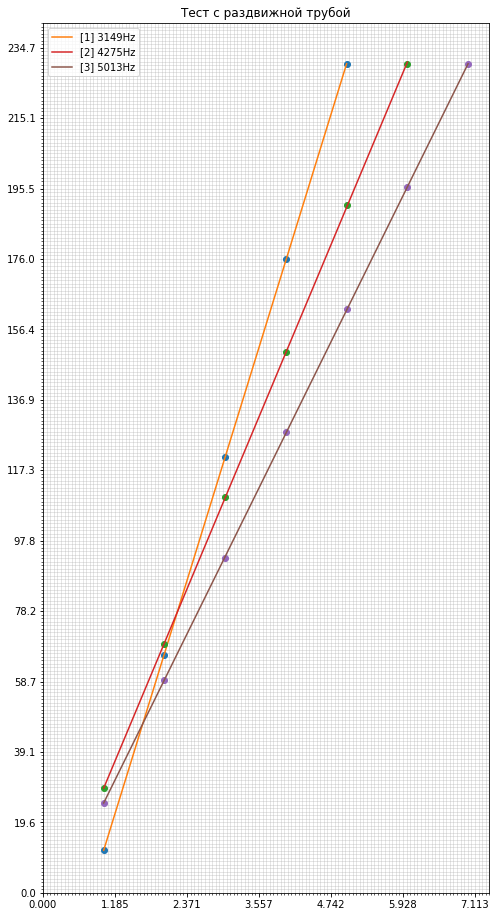

In [122]:
test_id = 0

def do2(freq, a):
    l = 700
    m = 29e-3
    r = 8.31
    t0 = 273
    
    # a -= a.min()
    global test_id
    test_id += 1
    b = np.arange(len(a))[::-1] + 1

    k, t = np.polyfit(b, a, 1)

    mnk_a, mnk_b, sigma_a, sigma_b = eval_mnk(b, a)
    #print(mnk_a, mnk_b, sigma_a, sigma_b, t, k)
    assert(abs(mnk_a -t) + abs(mnk_b - k) < 1e-8) 
    print("\n___Опыт " + str(test_id) + "____" )
    print("Частота = ", freq.mean())
    additions = pd.DataFrame([a], columns=list(range(1, len(a) + 1)))
    display(additions)
    
    c = freq.mean() * k*2. / 1000
    #Relative Error
    RE_c = prodErrorR([sigma_b / mnk_b, freq.std() / freq.mean()])
    sciPrintR(c, RE_c, "c (скорость звука) = ")
    
    gamma = c**2 * m / (r * (t0 + 23))
    RE_gamma = prodErrorR([RE_c, RE_c, 0.01/r, 2/(t0+23)])
    sciPrintR(gamma, RE_gamma, "Гамма = ")
    
    
    plt.plot(b, a, 'o')
    plt.plot(b, k * b + t, label="[" + str(test_id) + "] " + str(int(freq.mean())) + "Hz")

plt_lab_figure(7, 230)
do2(np.array([3153, 3149, 3147]), np.array([23, 17.6, 12.1, 6.6, 1.2]) * 10)
do2(np.array([4278, 4274, 4273]), np.array([23, 19.1, 15.01, 11, 6.9, 2.9]) * 10)
do2(np.array([5017, 5012, 5010]), np.array([23, 19.6, 16.2, 12.8, 9.3, 5.9, 2.5])* 10)

plt.title("Тест с раздвижной трубой")
plt.grid()
plt.legend()
plt.savefig("2.1.3_2_a.png", papertype="a4", format="png", bbox_inches=0)
plt.show()
!convert 2.1.3_2_a.png 2.1.3_2_a.pdf